In [1]:
# N-gram and Wordcloud coding helping from Clément Delteil
import csv
import chart_studio
import re
import string
# import emot
import collections
import ipywidgets
import contractions
import cufflinks
import nltk.tokenize

import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

from textblob import TextBlob
#from google.colab import widgets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

pd.set_option('display.max_colwidth', None)
sid = SentimentIntensityAnalyzer()
# emot_obj = emot.core.emot()
cufflinks.set_config_file(world_readable=True, theme='pearl')
cufflinks.go_offline()
pio.renderers.default = 'colab'

In [2]:
df = pd.read_json("../final_data_for_machine_learning.json")
df = df[(df["category"]=="Education")&(df["score"]==2)]

In [3]:
df.sample(n=5)

,comment,category,channel,video_url,video_id,channel_size,identity,expanded_text,processed_text,score
138129,love the movie reference at 2:02 😂,Education,https://www.youtube.com/@PhilosophyTube,https://www.youtube.com/watch?v=m81q-ZkfBm0,m81q-ZkfBm0,small,lgbt,love the movie reference at 2:02 😂,love the movie reference at 2:02 😂,2
141128,you're freaking beautiful.,Education,https://www.youtube.com/@lacigreen,https://www.youtube.com/watch?v=wh4nUlslmso,wh4nUlslmso,small,lgbt,you are freaking beautiful.,you are freaking beautiful.,2
140532,I loved Sherlock and Coupling.,Education,https://www.youtube.com/@hbomberguy,https://www.youtube.com/watch?v=LkoGBOs5ecM,LkoGBOs5ecM,small,lgbt,I loved Sherlock and Coupling.,I loved Sherlock and Coupling.,2
137953,"25:00 oh that's a good one. Socialists don't really act on ""resentment"", they act on ""Ressentiment"", which is a much more narrow term.",Education,https://www.youtube.com/@PhilosophyTube,https://www.youtube.com/watch?v=m81q-ZkfBm0,m81q-ZkfBm0,small,lgbt,"25:00 oh that is a good one. Socialists do not really act on ""resentment"", they act on ""Ressentiment"", which is a much more narrow term.","25:00 oh that is a good one. Socialists do not really act on ""resentment"", they act on ""Ressentiment"", which is a much more narrow term.",2
138435,"omg, new motto : being wrong in interesting ways",Education,https://www.youtube.com/@PhilosophyTube,https://www.youtube.com/watch?v=m81q-ZkfBm0,m81q-ZkfBm0,small,lgbt,"omg, new motto : being wrong in interesting ways","omg, new motto : being wrong in interesting ways",2


In [4]:
# Display the 20 most present bi-grams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['processed_text'], 20)

In [5]:
common_words

[('middle child', 39),
 ('sherlock holmes', 20),
 ('jordan peterson', 18),
 ('sex ed', 16),
 ('don ho', 13),
 ('youngest child', 11),
 ('did know', 10),
 ('oldest child', 10),
 ('long time', 9),
 ('feel like', 9),
 ('laci green', 9),
 ('pretty good', 8),
 ('tiny bubbles', 8),
 ('watched video', 7),
 ('great video', 7),
 ('hear yanny', 7),
 ('hear laurel', 7),
 ('love beedrill', 7),
 ('good video', 6),
 ('great content', 6)]

In [6]:
df1 = pd.DataFrame(common_words, columns = ['Comment_Text' , 'count'])
df1.head()

,Comment_Text,count
0,middle child,39
1,sherlock holmes,20
2,jordan peterson,18
3,sex ed,16
4,don ho,13


In [7]:
df1_sorted = df1.sort_values("count")
df1_sorted.head()

,Comment_Text,count
19,great content,6
18,good video,6
17,love beedrill,7
16,hear laurel,7
15,hear yanny,7


In [8]:
# df1.groupby('Comment_Text').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar',
#     yTitle='Count',
#     linecolor='black',
#     title='Top 20 bigrams in Comment before removing spams')

<Axes: ylabel='Comment_Text'>

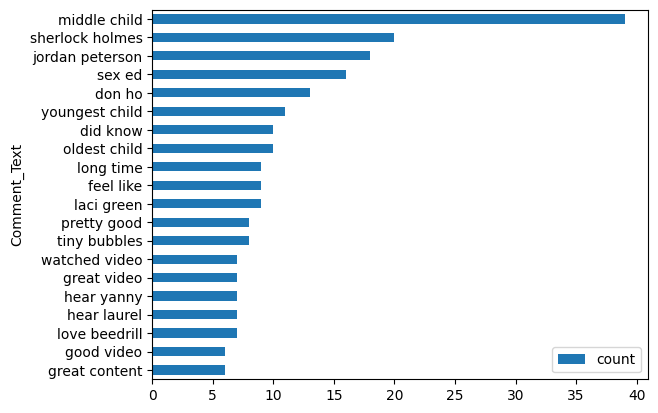

In [9]:
df1_sorted.plot.barh(x="Comment_Text")